<a href="https://colab.research.google.com/github/FrankAlvaradoR/Teor-a-de-Control/blob/main/Transformada_Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x[n]: 
 n
a 

 Transformada z desde sumatoria:
⎛   1     │a│    ⎞
⎜───────, │─│ < 1⎟
⎜  a      │z│    ⎟
⎜- ─ + 1         ⎟
⎝  z             ⎠

 Transformada z simplificada
  z   
──────
-a + z

 ROC: 
│a│    
│─│ < 1
│z│    

 polos:  {a: 1}
Poly(z - a, z, domain='ZZ[a]')

 el valor de Q:  Poly(z - a, z, domain='ZZ[a]')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


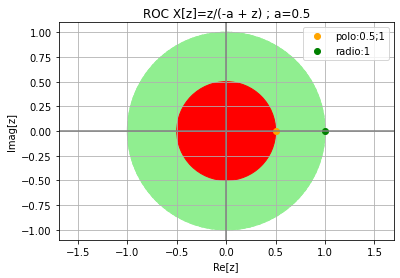

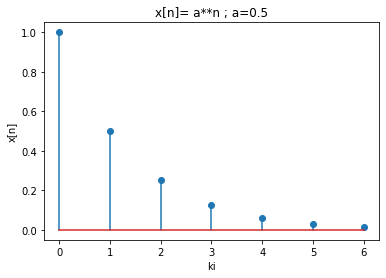

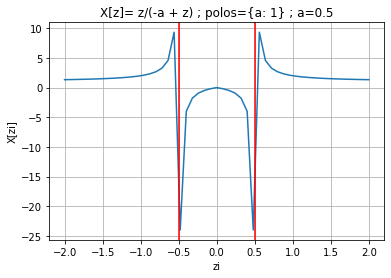

In [4]:
# transformada z de x[n]u[n]
# a es una constante
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# INGRESO
z = sym.symbols('z')
n = sym.symbols('n', integer=True, positive=True)
a = sym.symbols('a') #la constante

u  = sym.Heaviside(n)
xn = (a**n)*u

# parametros
a1 = 0.5 # valor a
m = 7    # Términos a graficar

# PROCEDIMIENTO
fnz = xn*(z**(-n))
# sumatoria en intervalo
Fz_n = sym.summation(fnz,(n,0,sym.oo))
Fz = Fz_n.args[0]  # primer intervalo
Xz = Fz[0].simplify() # expresion buscada

ROC = Fz[1]

# polos
[P,Q] = Xz.as_numer_denom()
Q = Q.as_poly(z)
Q_raiz = sym.roots(Q)

# SALIDA
print('x[n]: ')
sym.pprint(xn)
print('\n Transformada z desde sumatoria:')
sym.pprint(Fz)
print('\n Transformada z simplificada')
sym.pprint(Xz)
print('\n ROC: ')
sym.pprint(ROC)
print('\n polos: ',Q_raiz)

# GRAFICA valores
sym.pprint(Q)
print('\n el valor de Q: ',Q)
Qa = Q.subs(a,a1)
Qa = Qa.as_poly(z)
Qa_raiz = sym.roots(Qa)
# x[n]
fn = sym.lambdify([n,a],xn)
ki = np.arange(0,m,1)
xnk = fn(ki,a1)
# X[z]
fz = sym.lambdify([z,a],Xz)
zlim = int(np.max([a1,1])*2)
zi  = np.linspace(-zlim,zlim,51)
Xzi = fz(np.abs(zi),a1) # usa |z|
# Revisar cuando z es complejo

# grafica plano z imaginario
figura, grafROC = plt.subplots()
# limite
radio1 = plt.Circle((0,0),1,color='lightgreen',
                    fill=True)
radio2 = plt.Circle((0,0),1,linestyle='dashed',
                    color='lightgreen',fill=False)
grafROC.add_patch(radio1)
for raiz in Qa_raiz.keys():
    [r_real,r_imag] = raiz.as_real_imag()
    radio_raiz = np.abs(raiz)
    nROC = plt.Circle((0,0),radio_raiz,
                      color='red',fill=True)
    grafROC.add_patch(nROC)
grafROC.add_patch(radio2) # borde r=1
grafROC.axis('equal')
# marcas de r=1 y valor a
for raiz in Qa_raiz.keys():
    [r_real,r_imag] = raiz.as_real_imag()
    grafROC.plot(r_real,r_imag,'o',color='orange',
             label ='polo:'+str(float(np.abs(raiz)))+';'+str(Qa_raiz[raiz]))
grafROC.plot(1,0,'o',color='green',
         label ='radio:'+str(1))

plt.axhline(0,color='grey')
plt.axvline(0,color='grey')
plt.grid()
plt.legend()
plt.xlabel('Re[z]')
plt.ylabel('Imag[z]')
untitulo = 'ROC X[z]='+str(Xz)
untitulo = untitulo+ ' ; a='+str(a1)
plt.title(untitulo)

# entrada x[n]
figura, grafxn = plt.subplots()
plt.stem(ki,xnk)

plt.xlabel('ki')
plt.ylabel('x[n]')
plt.title('x[n]= '+str(xn)+' ; a='+str(a1))

# dominio z, corte en plano real
figura, grafXz = plt.subplots()
plt.plot(zi,Xzi,label='X[z]')
for raiz in Qa_raiz.keys():
    [r_real,r_imag] = raiz.as_real_imag()
    radio_raiz = np.abs(raiz)
    plt.axvline(radio_raiz,color='red')
    plt.axvline(-radio_raiz,color='red')
plt.grid()
untitulo ='X[z]= '+str(Xz)
untitulo = untitulo+ ' ; polos='+str(Q_raiz)
untitulo = untitulo+ ' ; a='+str(a1)
plt.title(untitulo)
plt.xlabel('zi')
plt.ylabel('X[zi]')

plt.show()